# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">🟠Time Series Essentials🟠</p>

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">What is Time Series?</p>

### A dataset consisting of observation values arranged over time. Examples include stock market data, weather data, etc.

### The concepts of Stationary, Trend, Seasonality, and Cycle are crucial for interpreting time series data.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Stationary</font></h3>

### Stationary refers to the statistical properties of a series remaining constant over time. If the mean, variance, and covariance of a time series remain constant throughout time, the series is considered stationary. Theoretically, when time series data follows a specific pattern, it becomes more predictable. If a time series is stationary, predictions can be made more comfortably. In cases where non-stationarity is observed, the difference of the series is taken. For instance, if there are values on Mondays and also on Sundays at time T, these two values are subtracted from each other, making the series stationary.

<center><img src="https://i.imgur.com/w4hjZfj.png" width="800" height="800"></center>

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Trend</font></h3>

### It is one of the most critical topics for the time series domain. Awareness of the concept of Trend is essential in every field. The structure indicating the long-term increase or decrease in a time series is referred to as a trend. If there is a trend, the probability of the series being stationary is very low.

<center><img src="https://i.imgur.com/eJCnIks.png" width="800" height="800"></center>

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Seasonality</font></h3>

### The condition where a time series exhibits a specific behavior that repeats at regular intervals is referred to as seasonality.

<center><img src="https://i.imgur.com/RXuiFZl.png" width="800" height="800"></center>

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Cycle</font></h3>

### Cyclical patterns are similar to seasonality but distinct from it. Although not critically important for forecasting, it is necessary to distinguish between them. Seasonality is more pronounced, short-term, and regularly associated with specific intervals such as days, weeks, or seasons. On the other hand, cyclical patterns are longer-term, more uncertain in nature, and do not align with specific intervals like days, weeks, or seasons. They often emerge due to structural reasons, such as changes influenced by statements from certain individuals in the political arena.

<center><img src="https://i.imgur.com/csokQjq.png" width="800" height="800"></center>

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Understanding the Nature of Time Series Models</p>

### Our goal is to predict what will happen on the next day. In a time series period, the future day progresses most influenced by its value from one day before. Building on this assumption,
### We can predict the next value by taking the average of the preceding 4-5 values. However, on the other hand, considering that the series previously experienced significant declines and increases,
### We can also take the averages of these points on the same date and add it as well. Carrying information about past seasonality and focusing on past values makes sense.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Moving Average</font></h3>

### The future value of a time series is the average of its k previous values. Moving average is generally used not for prediction but to capture and observe a trend.

> However, within the scope of ML, we derive features based on moving averages when generating features.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Weighted Average</font></h3>

### Weighted average is similar to moving average. It carries the idea of giving more weight to later observations. For example, when taking the weighted average, we can make a balanced prediction by assigning more weight to the first 4 days and gradually decreasing the weight for the subsequent days.


> As it is understood, time series data is more influenced by its previous values. Therefore, going back to the previous values is a focus for us. How to go back to the previous values is also a focus,for example, using moving average or weighted average.

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Smoothing Methods (Holt-Winters)</p>

### We will experiment with all known methods using an optimization approach and declare the best model as the one that gives the lowest error.

In [93]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing , SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


warnings.filterwarnings('ignore')

In [30]:
# Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.
# Period of Record: March 1958 - December 2001

# Loading data from statsmodel
data = sm.datasets.co2.load_pandas()

In [31]:
# Creating our time series data
y = data.data

In [32]:
# It is more reasonable to make predictions on a monthly basis, so we are converting from weekly to monthly format.
y = y['co2'].resample('MS').mean()

In [33]:
# There are 5 missing values
y.isnull().sum()

5

In [34]:
# Missing values in time series can be filled with preceding or succeeding values. 
#The value in the 6th month was NaN, and we filled it with the value from the 7th month.
y = y.fillna(y.bfill())

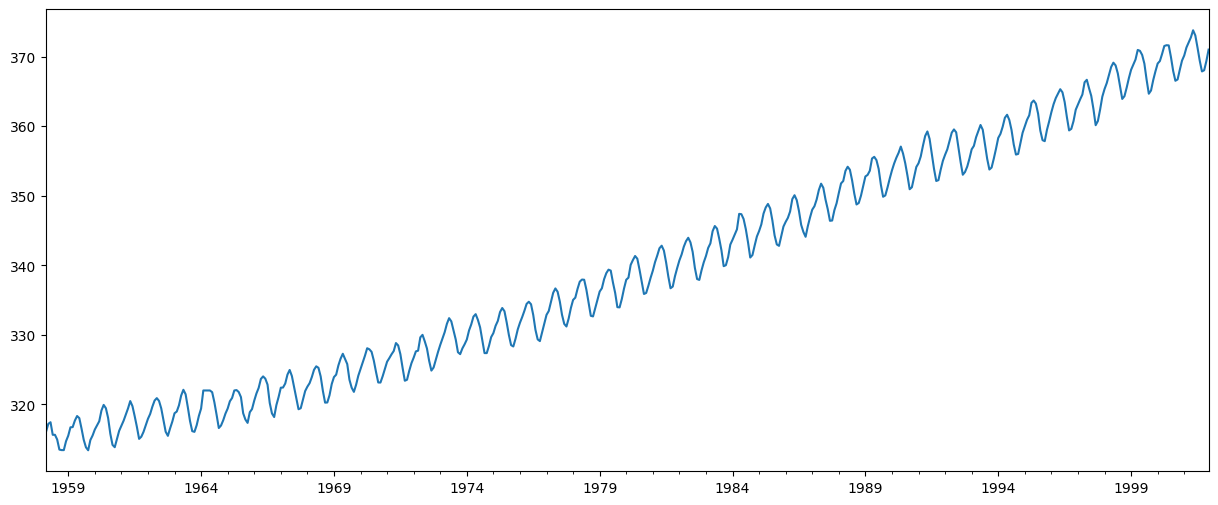

In [35]:
y.plot(figsize=(15, 6))
plt.show()
# This series has a trend. It is not stationary. It also exhibits seasonality.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Holdout</font></h3>

In [37]:
# We are splitting the dataset into two parts.
train = y[:'1997-12-01']
len(train)  # 478 months

478

In [38]:
# Test set from January 1998 to the end of 2001.
test = y['1998-01-01':]
len(test)  # 48 months
# We split the data into training and testing sets to prevent overfitting and to evaluate our errors more accurately.

48

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'> Time Series Structural Analysis</font></h3>

In [39]:
#Dickey-Fuller Test

def is_stationary(y):

    # "HO: Non-stationary"
    # "H1: Stationary"

    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

is_stationary(y)
# We conduct our hypothesis test, and the p-value is 0.999, indicating that the series is not stationary.

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


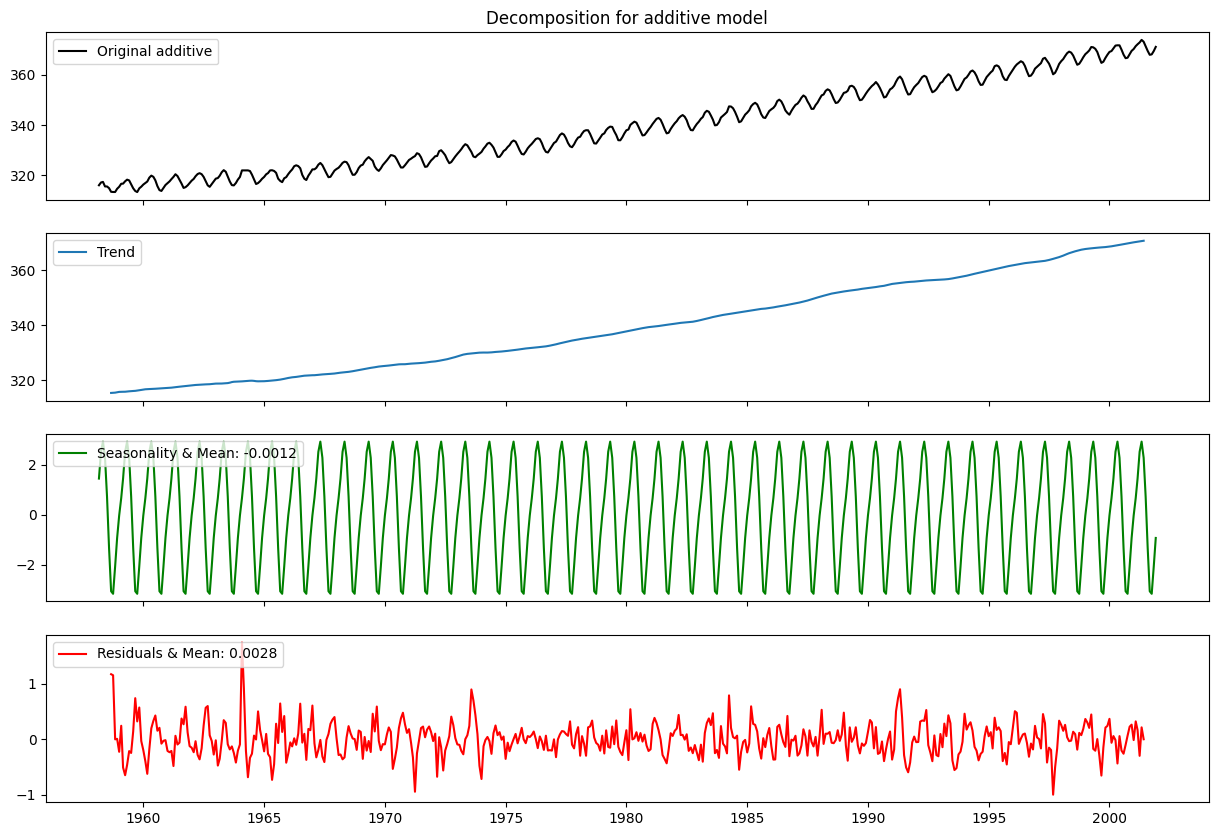

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


In [41]:
## Time Series Components and Stationarity Test

def ts_decompose(y, model="additive", stationary=False):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    if stationary:
        is_stationary(y)

ts_decompose(y, stationary=True)

###  The components of the additive model are revealed. In the first plot, we see the level, which represents the values of the series. 
### The trend is spread out, there is seasonality, and in the last part, we observe the residuals. 
### We expect the mean of the residuals to be around 0, and we can obtain an output that tells us whether the series is stationary or not.

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Single Exponential Smoothing</p>

###  It is successful only for stationary series. There should be no trend or seasonality.
### It makes predictions by applying exponential correction.
### It assumes that the future is more related to the recent past, and the effects of the past are weighted exponentially.

>SES = Level

In [42]:
# Building our model / We input the alpha value as 0.5; if we hadn't, Simple Exponential Smoothing would have found it correctly by default.
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)

In [43]:
# Making predictions / We use forecast instead of predict.
y_pred = ses_model.forecast(48)

In [44]:
# We get an error of 5.70.
mean_absolute_error(test, y_pred)

5.706393369643809

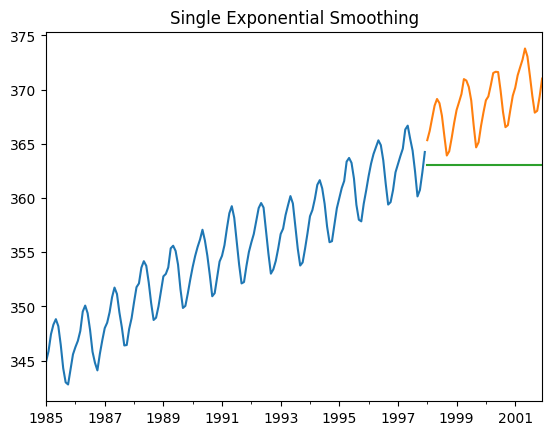

In [45]:
# Visualizing, the green values are our predictions. As seen, the predictions are not very accurate.
train["1985":].plot(title="Single Exponential Smoothing")
test.plot()
y_pred.plot()
plt.show()

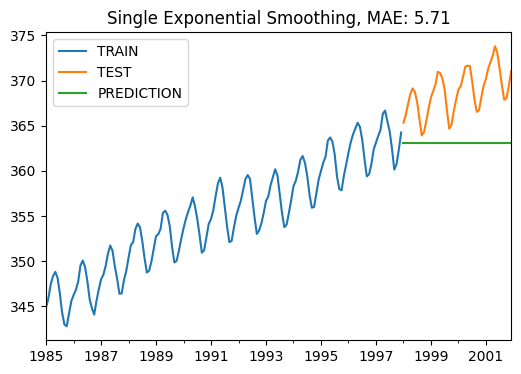

In [46]:
# Since we will frequently use this visualization, I define a function.
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

plot_co2(train, test, y_pred, "Single Exponential Smoothing")

In [47]:
# We can check the parameters.
ses_model.params

{'smoothing_level': 0.5,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 316.1,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Hyperparameter Optimization</font></h3>

In [51]:
# We are trying to find the error with different alpha values and see how well our predictions are.
def ses_optimizer(train, alphas, step=48):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)
# Creating a range of values from 0.8 to 1 in steps of 0.01.

<center><span style="color:#f7c297;font-family:cursive;font-size:100%"> -SES Formula- </span></center>
<center><img src="https://i.imgur.com/HK6aRML.png" width="800" height="800"></center>

In [52]:
# Capturing the best alpha and best mae.
best_alpha, best_mae = ses_optimizer(train, alphas)

best_alpha: 0.99 best_mae: 4.5451


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final SES Model</font></h3>

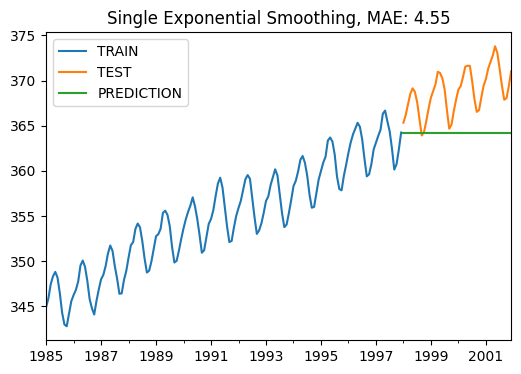

In [53]:
# We build our final model.
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(48)

plot_co2(train, test, y_pred, "Single Exponential Smoothing")
# The green values, i.e., our predictions, did not improve significantly but got slightly closer.

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Double Exponential Smoothing (DES)</p>

### It applies exponential correction, taking trend into account.
### DES: Level (SES) + Trend
### The fundamental approach is the same as SES, but it also considers the trend.
### Suitable for univariate time series with trend but without seasonality.

### The total model we saw above is the additive model, and the one below is the multiplicative model. A multiplicative series carries the expression that there are multiplicative expressions in the function. If the seasonal and residual components are independent of the trend, then the series is an additive series. If they are not independent, it is a multiplicative series.
### If seasonal and residuals are distributed around 0, it is additive.

> y(t) = Level + Trend + Seasonality + Noise

> y(t) = Level * Trend * Seasonality * Noise

In [54]:
# Building our model and adding the trend.
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=0.5,
                                                         smoothing_trend=0.5)

In [55]:
# Making predictions.
y_pred = des_model.forecast(48)

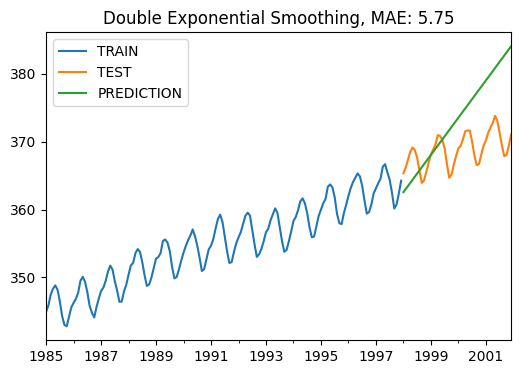

In [56]:
plot_co2(train, test, y_pred, "Double Exponential Smoothing")
# Our green line represents our predictions, and it seems to be going upward.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Hyperparameter Optimization</font></h3>

In [58]:
#Searching for best parameters
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas)

best_alpha: 0.01 best_beta: 0.71 best_mae: 1.7411


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final DES Model</font></h3>

In [59]:
# Building our final model with the best parameters.
final_des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                               smoothing_slope=best_beta)

In [60]:
# Making predictions.
y_pred = final_des_model.forecast(48)

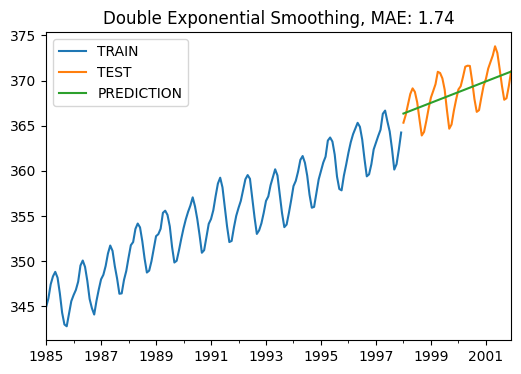

In [61]:
# Visualizing, we see that the green line is right in the middle, indicating that we did not capture the seasonality.
plot_co2(train, test, y_pred, "Double Exponential Smoothing")

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Triple Exponential Smoothing (Holt-Winters)</p>

### Triple exponential smoothing is the most advanced smoothing method.
### This method dynamically evaluates the effects of level, trend, and seasonality to make predictions.
### It can be used for univariate time series with either trend or seasonality or both.
> TES = SES + DES + Seasonality

In [62]:
# Building our model.
tes_model = ExponentialSmoothing(train,
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=12).fit(smoothing_level=0.5,
                                                          smoothing_slope=0.5,
                                                          smoothing_seasonal=0.5)

In [63]:
# Making predictions.
y_pred = tes_model.forecast(48)

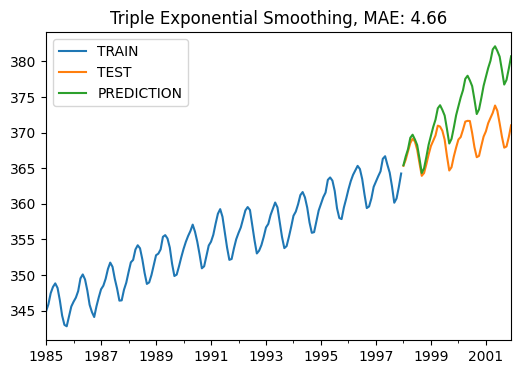

In [64]:
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")
# We got a slightly more consistent result, but it is still not good; we need to perform parameter optimization.

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Hyperparameter Optimization</font></h3>

In [65]:
# Generating 3 combinations.
alphas = betas = gammas = np.arange(0.20, 1, 0.10)
# Converting to a list.
abg = list(itertools.product(alphas, betas, gammas))

def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)

best_alpha: 0.8 best_beta: 0.5 best_gamma: 0.7 best_mae: 0.606


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final TES Model</font></h3>

In [66]:
# Building the final model with the best values we have.
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

In [67]:
# Making predictions.
y_pred = final_tes_model.forecast(48)

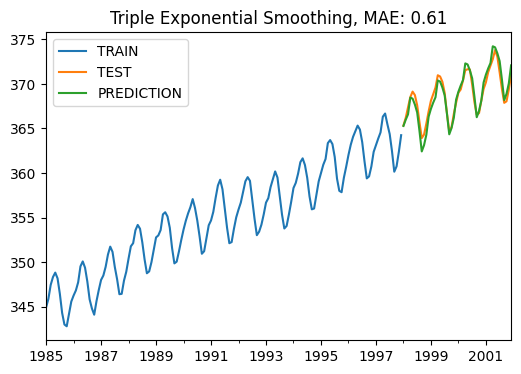

In [68]:
# Visualizing, we see that we obtained a very good result.
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Statistical Methods</p>

### I will talk about some methods that form the basis of this subject within the scope of statistical methods.
### The first method we will see is Autoregression, AR(p). The prediction process is made with a linear combination of observations in previous time steps.
### It is suitable for univariate time series without trend and seasonality. p: the number of time lags. If p = 1, it means that the model is built with the previous time step. It is similar to SES but considered as a regression here.

### MA(q): Moving Average
### Prediction is made with a linear combination of errors obtained in previous time steps.
### It is suitable for univariate time series without trend and seasonality.
> q: the number of time lags.

> ARMA(p, q) = AR(p) + MA(q)
### The ARMA model is the sibling of the SES model. In the SES model, there is a coefficient called the smoothing factor that weighs the effects of these two terms. In ARMA, the weight of past actual values is represented by a1, and the coefficient of residuals is represented by m1, both independent of each other. In SES, both are dependent on a single expression.
### While the terms in the Holt-Winters methods are shaped by a single parameter, in ARMA models, the terms have their parameters. In other words, the essence of the data is learned.
### It combines Autoregressive moving average AR and MA methods.
### Prediction is made with a linear combination of past values and past errors.
### It is suitable for univariate time series without trend and seasonality.
### p and q are the number of time lags. p for the AR model and q for the MA model.


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Reuploading our dataset</font></h3>

In [70]:
# Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.
# Period of Record: March 1958 - December 2001
#doing same stuff i have done above

data = sm.datasets.co2.load_pandas()
y = data.data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
train = y[:'1997-12-01']
test = y['1998-01-01':]

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">ARIMA(p, d, q): (Autoregressive Integrated Moving Average)</p>

### ARIMA models can model both trend and seasonality. Prediction is made with a linear combination of differenced observations from previous time steps and errors. It predicts the future by subtracting the values of today and the previous day.It is suitable for univariate data with trend but without seasonality.

> p represents the number of real value lags, p = 2 means yt-1 and yt-2 are in the model.

> d represents the number of differencing operations.

> q is the number of error lags. We will generate p, d, q values with the brute-force method and try to predict the best ones.

In [75]:
#Building our model and predict
model = sm.tsa.arima.ARIMA(train, order=(1, 1, 1))
arima_model = model.fit()

arima_model.summary()
# The lower the AIC and BIC, the better.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.768
Date:                Sat, 16 Dec 2023   AIC                           1157.537
Time:                        13:04:35   BIC                           1170.039
Sample:                    03-01-1958   HQIC                          1162.452
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5669      0.054     10.586      0.000       0.462       0.672
ma.L1          0.3284      0.062      5.306      0.000       0.207       0.450
sigma2         0.6534      0.050     12.965      0.000       0.555       0.752
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.13   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
# Getting our predictions, then converting them to a pd series so that our visualization function works.
y_pred = arima_model.get_forecast(steps=48).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

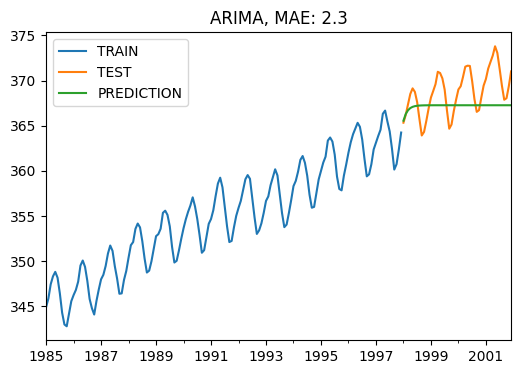

In [77]:
plot_co2(train, test, y_pred, "ARIMA")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Hyperparameter Optimization </font></h3>

In [78]:
# We are specifying the range from 0 to 4.
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model = sm.tsa.ARIMA(train, order=order).fit()
            aic = arima_model.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

best_params_aic = arima_optimizer_aic(train, pdq)
# Getting the best AIC values.

Best ARIMA(2, 1, 3) AIC=843.22


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final Model </font></h3>

In [79]:
# Fit the final ARIMA model using the best hyperparameters selected by AIC
arima_model = sm.tsa.ARIMA(train, order=best_params_aic).fit()

In [80]:
# Make predictions for the test set
y_pred = arima_model.forecast(steps=len(test))

In [81]:
# Convert predictions to a pandas Series with the correct index
y_pred = pd.Series(y_pred, index=test.index)

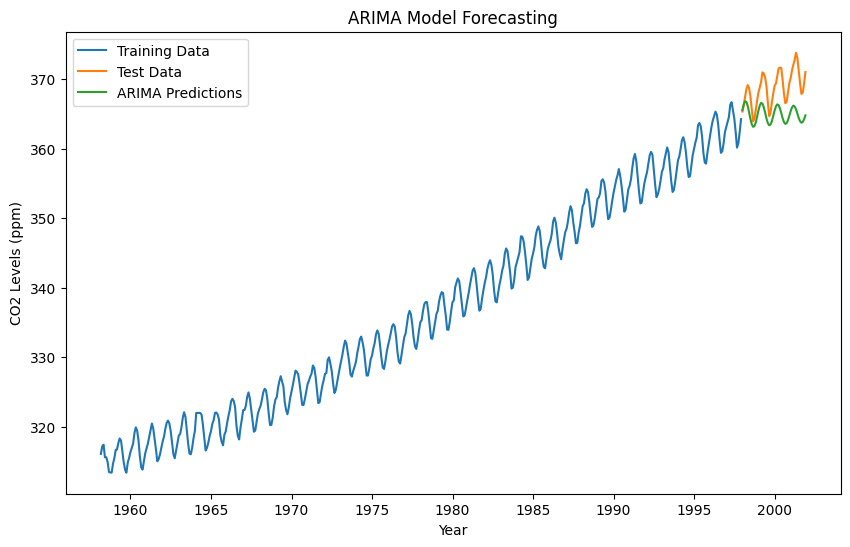

In [82]:
# Plot the actual data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(y_pred, label='ARIMA Predictions')
plt.legend()
plt.xlabel('Year')
plt.ylabel('CO2 Levels (ppm)')
plt.title('ARIMA Model Forecasting')
plt.show()

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)</p>

### It can be used for univariate time series with trend or seasonality.
### p, d, q are parameters coming from ARIMA, which model the trend. ARIMA could model the trend.

> p = number of real value lags (autoregressive degree)

> d: number of differencing operations

> q = number of error lags (moving average degree)

> P, D, Q are seasonal lags, which are season elements from ARIMA.

> m is the number of time steps for a single seasonality period, representing the structure of occurrence.


In [83]:
# We are building our model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))

In [84]:
# We are fitting our model
sarima_model = model.fit(disp=0)

In [85]:
# We are forecasting
y_pred_test = sarima_model.get_forecast(steps=48)

In [86]:
# The predicted values are stored in a certain format, we retrieve them by using the mean function
y_pred = y_pred_test.predicted_mean

In [87]:
# We convert it to a pandas series for our visualization function
y_pred = pd.Series(y_pred, index=test.index)

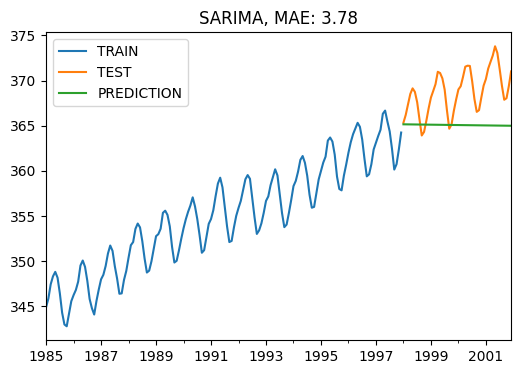

In [88]:
# We visualize the results, and we get a poor result with randomly inputted values
plot_co2(train, test, y_pred, "SARIMA")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Hyperparameter Optimization</font></h3>

In [89]:
# We create p, d, q values between 0 and 2, generate possible combinations with itertools, and set the pattern completion information 
#to 12 months for the model.
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:323.31288045170305


<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Making Final Model with best Parameters</font></h3>

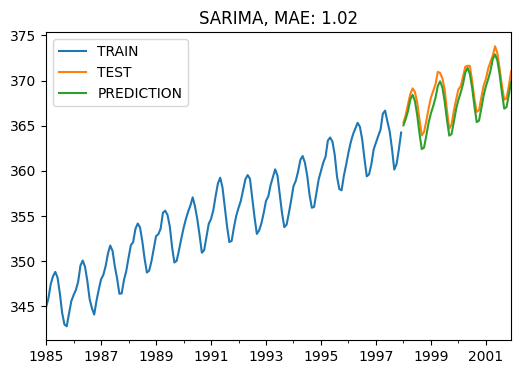

In [90]:
# Building our final model with the best parameters
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
#fitting our model
sarima_final_model = model.fit(disp=0)
#making prediction
y_pred_test = sarima_final_model.get_forecast(steps=48)
#The predicted values are stored in a certain format, we retrieve them by using the mean function
y_pred = y_pred_test.predicted_mean
# We convert it to a pandas series for our visualization function
y_pred = pd.Series(y_pred, index=test.index)
# Visualize and observe that our model is quite consistent
plot_co2(train, test, y_pred, "SARIMA")

# Our error is 1.2

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>BONUS: SARIMA Optimization Based on MAE</font></h3>

SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - MAE:0.5343572489022771


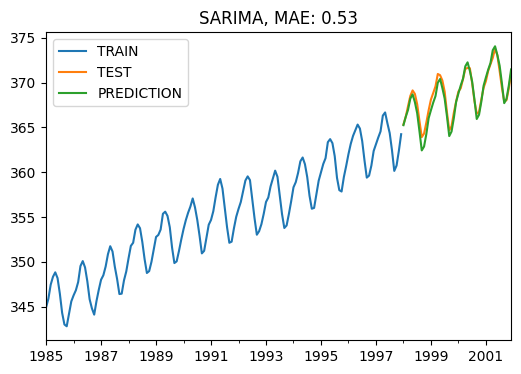

In [91]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=48)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

y_pred_test = sarima_final_model.get_forecast(steps=48)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "SARIMA")
# We reduced it to 0.53

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final Model</font></h3>

In [92]:
# We previously completed our final models through trial and error after the train-test split.
# However, in the current model, our optimization process is complete.
# We will now build the final model using the entire dataset.
# Our dataset predicts until the end of 2001, and we will predict the first 7 months of 2002.

model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

feature_predict = sarima_final_model.get_forecast(steps=6)
feature_predict = feature_predict.predicted_mean
feature_predict

2002-01-01    371.930530
2002-02-01    372.718072
2002-03-01    373.585289
2002-04-01    374.494056
2002-05-01    375.101888
2002-06-01    374.687872
Freq: MS, Name: predicted_mean, dtype: float64

# <p style="border-radius:10px; border:#DEB887 solid; padding:25px; background-color: #FFFAF0; font-size:100%;color:#52017A;text-align:center;">Airline Passenger Forecasting</p>

In [94]:
df = pd.read_csv('/kaggle/input/private2/airline-passengers.csv', index_col='month', parse_dates=True)

In [95]:
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


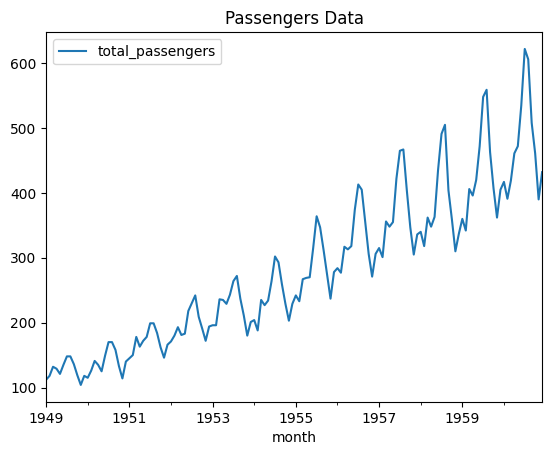

In [96]:
df[['total_passengers']].plot(title='Passengers Data')
plt.show()

In [97]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

In [98]:
df.index.freq = "MS"

In [99]:
train = df[:120]
test = df[120:]

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Single Exponential Smoothing</font></h3>

In [100]:
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)
# best_alpha: 0.11 best_mae: 82.528

best_alpha: 0.11 best_mae: 82.528


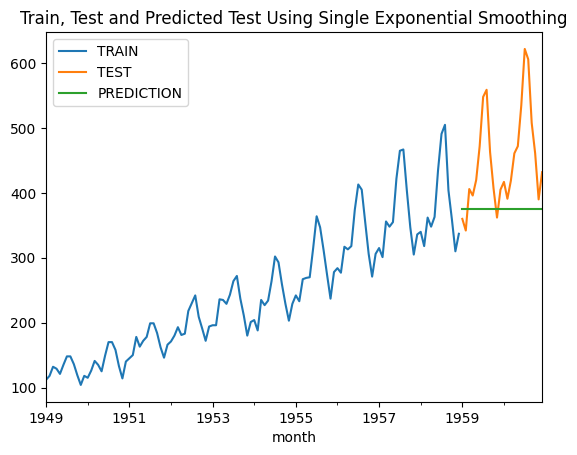

In [101]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

plot_prediction(y_pred, "Single Exponential Smoothing")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Double Exponential Smoothing</font></h3>

In [105]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=24)
# best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036

best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036


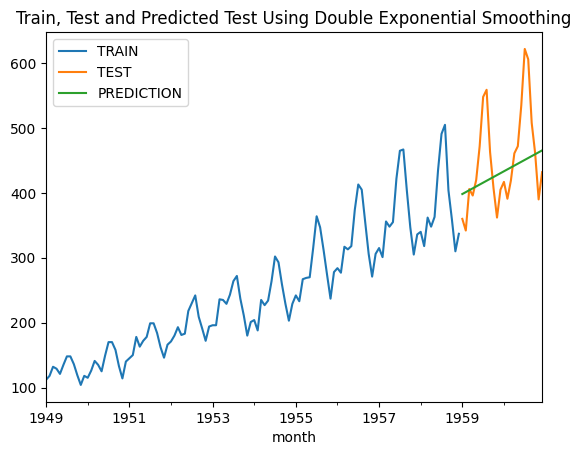

In [106]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(24)

plot_prediction(y_pred, "Double Exponential Smoothing")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Triple Exponential Smoothing (Holt-Winters)</font></h3>

In [103]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=24)

# best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947

best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947


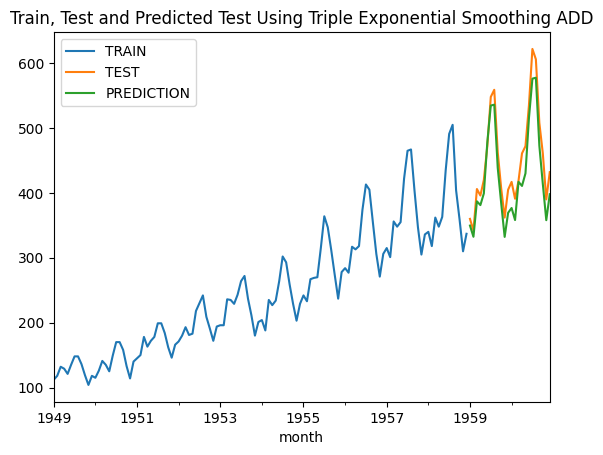

In [104]:
tes_model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(24)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>ARIMA(p, d, q): (Autoregressive Integrated Moving Average)</font></h3>

In [107]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_params_aic = arima_optimizer_aic(train, pdq)

arima_model = sm.tsa.ARIMA(train, order=best_params_aic).fit()

Best ARIMA(3, 1, 3) AIC=1089.76


In [108]:
y_pred = arima_model.forecast(24)[0]
y_pred = pd.Series(y_pred, index=test.index)
mean_absolute_error(test, y_pred)
# 91.40003384495344

91.40003384495344

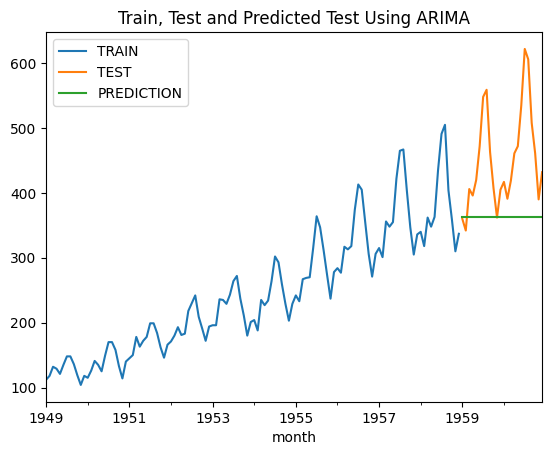

In [109]:
plot_prediction(pd.Series(y_pred, index=test.index), "ARIMA")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>SARIMA</font></h3>

In [110]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:803.2812826904759


In [111]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)

y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 68.57726547031133

68.57726547031133

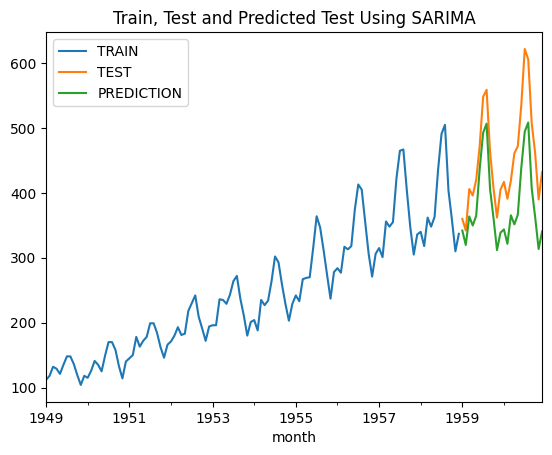

In [112]:
plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>SARIMA Optimization Based on MAE</font></h3>

In [118]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order


best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.674705058819836


In [119]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 30.674705058819836

30.674705058819836

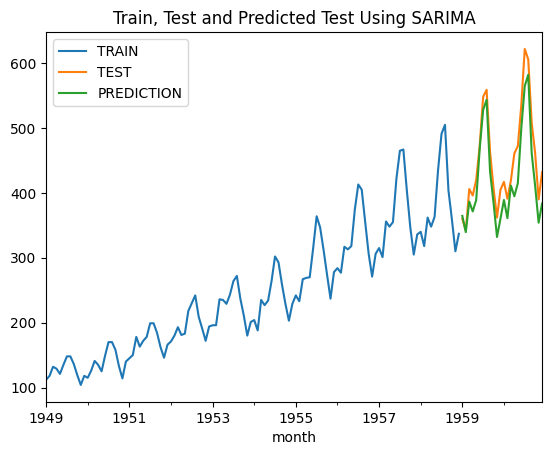

In [120]:
plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>Final model</font></h3>

In [121]:
tes_model_final = ExponentialSmoothing(df, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

tes_model_final.forecast(6)

1961-01-01    445.541524
1961-02-01    424.219357
1961-03-01    465.859503
1961-04-01    482.325478
1961-05-01    496.502850
1961-06-01    557.148285
Freq: MS, dtype: float64

### If you found this notebook helpful, please don't forget to upvote. Below, I've provided an explanation of when each model might be most suitable.

<center><img src="https://i.imgur.com/3c8Cxlv.png" width="800" height="800"></center>